# Example data analysis notebook

This notebook downloads and analyses some surface air temperature anomaly data from [Berkeley Earth](http://berkeleyearth.org/).

Import the required libraries.

In [12]:
import os
import matplotlib.pyplot as plt
import numpy as np
import requests

In [9]:
def generate_url(location):
    url = f'http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/{location}-TAVG-Trend.txt'
    return url

In [15]:
def download_data(location):
    """
    Downloads average temperature data for `location`. Returns as a np.array.
    """
    url = generate_url(location)
    response = requests.get(url)
    data = np.loadtxt(response.iter_lines(), comments="%")
    return data

Use the [requests](http://docs.python-requests.org/) library to download the data file for Australia.

In [2]:
# Define the URL
url = 'http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/australia-TAVG-Trend.txt'
# Download the content of the URL
response = requests.get(url)
# Save it to a file
with open("data.txt", 'w') as open_file:
    open_file.write(response.text)

In [11]:
generate_url("australia") == 'http://berkeleyearth.lbl.gov/auto/Regional/TAVG/Text/australia-TAVG-Trend.txt'

True

Load the data using numpy (skip the header records which are marked with a `%`).

In [16]:
data = download_data('australia')

In [17]:
data.shape

(1935, 12)

Extract the monthly temperature anomaly and calculate an approximate "decimal year" to use in plotting.

In [4]:
decimal_year = data[:, 0] + 1/12*(data[:, 1] - 1)
temperature_anomaly = data[:, 2]

Plot the data so we can see what it's like.

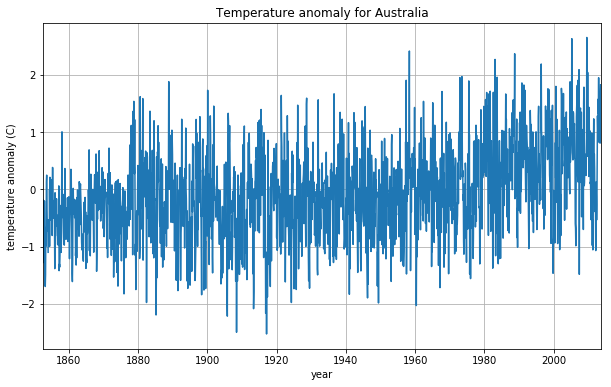

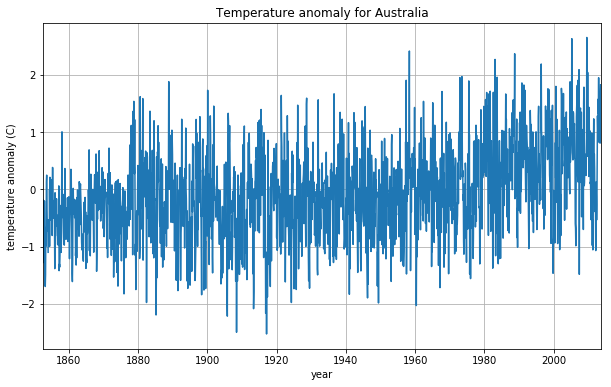

In [6]:
plt.figure(figsize=(10, 6))
plt.title("Temperature anomaly for Australia")
plt.plot(decimal_year, temperature_anomaly)
plt.xlabel('year')
plt.ylabel('temperature anomaly (C)')
plt.grid()
plt.xlim(decimal_year.min(), decimal_year.max())
plt.show()

The data are kind of noisy at this scale so let's calculate a 12-month moving average for a smoother time series.

In [7]:
def moving_average(data, width):
    moving_avg = np.full(data.size, np.nan)
    for i in range(width, moving_avg.size - width):
        moving_avg[i] = np.mean(temperature_anomaly[i - width:i + width])
    return moving_avg

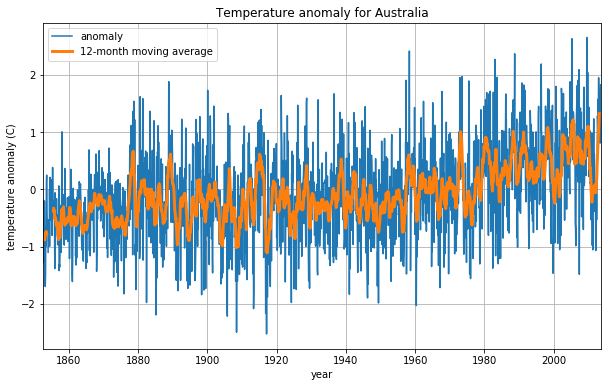

In [8]:
plt.figure(figsize=(10, 6))
plt.title("Temperature anomaly for Australia")
plt.plot(decimal_year, temperature_anomaly, label="anomaly")
plt.plot(decimal_year, moving_avg, label="12-month moving average", linewidth=3)
plt.xlabel('year')
plt.ylabel('temperature anomaly (C)')
plt.legend()
plt.grid()
plt.xlim(decimal_year.min(), decimal_year.max())
plt.show()